# Using Ensembled Algorithm

## Author - Kevin Abraham

For this Classification task use the main Bank Marketing dataset. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Use both bagging and boosting algorithms to predict variable y. for example use random forest with ranging number of trees. Also use an integer value for your random seed. Document your observations and analyze your results using 3 or more performance metrics.

divide your data into **70-30** train and test.

### Import necessary libraries and load data

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns


In [2]:
path= 'C:/Users/Owner/Desktop/BDA Exam 102 Fall/BDA Exam 102 Fall/ensemble/bank-full.csv'

In [3]:
#bmarketing_col=['Cust_num', 'age', 'job', 'marital', 'education', 'default',
#       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
#       'campaign', 'pdays', 'previous', 'poutcome', 'y']

#bmarketing_df = pd.read_csv(path,names = bmarketing_col, sep = ';', index_col = 0, low_memory=False)
bmarketing_df = pd.read_csv(path, sep=';')

In [4]:
bmarketing_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Checking for Missing Values 

In [5]:
# Count missing values for each column (if any)
null_columns=bmarketing_df.columns[bmarketing_df.isnull().any()]
bmarketing_df[null_columns].isnull().sum() 

Series([], dtype: float64)

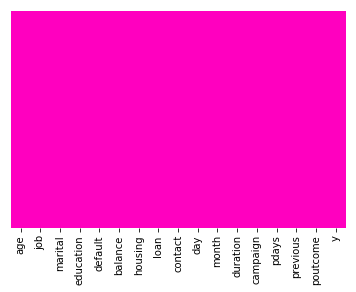

In [6]:
sns.heatmap(bmarketing_df.isnull(),yticklabels=False,cbar=False,cmap='gist_rainbow_r')

#### No missing values but multiple 'Unknown' for 'poutcome' & 'contact' column

In [7]:
# Review breakdown of unknowns in poutcome
pd.value_counts(bmarketing_df.poutcome)

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

**About 83% of this column are 'unknown'. This is not particularly useful in predicting term deposit (y)**

In [8]:
pd.value_counts(bmarketing_df.contact)

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [9]:
# Total # of records
len(bmarketing_df)

45211

### Clean and prepare data

In [10]:
# Dropping 'poutcome' as 83% of value --> unknown. Likely not useful information 
bmarketing_df = bmarketing_df.drop(bmarketing_df.columns[[15]], axis=1)

In [11]:
bmarketing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


In [12]:
len(bmarketing_df)

45211

In [13]:
bmarketing_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object

### Convert object/categorical to numerical values 

In [14]:
for col in set(bmarketing_df.columns) - set(bmarketing_df.describe().columns):
    bmarketing_df[col] = bmarketing_df[col].astype('category')
    
print(bmarketing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
y            45211 non-null category
dtypes: category(9), int64(7)
memory usage: 2.8 MB
None


### Encode categorical data to numerical

In [15]:
# Loop through all categorical columns and encode data to numerical values
for col in set(bmarketing_df.columns) - set(bmarketing_df.describe().columns):
     bmarketing_df[col] = bmarketing_df[col].cat.codes

In [16]:
bmarketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
y            45211 non-null int8
dtypes: int64(7), int8(9)
memory usage: 2.8 MB


In [17]:
bmarketing_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0


### Train/Test Split data (70-30)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn import metrics


## Bagging Classifiers:

## Decision Tree Classifier:

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
X = bmarketing_df.drop('y', axis = 1)
y = bmarketing_df['y']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
predictions = dtree.predict(X_test)

In [25]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[11029   944]
 [  843   748]]
             precision    recall  f1-score   support

          0       0.93      0.92      0.93     11973
          1       0.44      0.47      0.46      1591

avg / total       0.87      0.87      0.87     13564



### Mean Squared Error (MSE)

In [26]:
result = metrics.mean_squared_error(y_test, predictions)
result

0.13174579769979358

**With default conditions, the decision tree classifier has an accuracy ~ 87%**



### Bagged Decision Tree Classifier

In [27]:
seed = 7
kfold = model_selection.KFold(n_splits = 10, random_state = seed)

In [28]:
dtree = DecisionTreeClassifier()

#### 100 Trees

In [139]:
num_trees = 100
model = BaggingClassifier(base_estimator = dtree, n_estimators = num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.8571783688504215


#### 50 Trees (seed = 7)

In [141]:
dtree = DecisionTreeClassifier()

In [142]:
num_trees = 50
model = BaggingClassifier(base_estimator = dtree, n_estimators = num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.855873352728791


#### 200 Trees (seed = 7)

In [29]:
num_trees = 200
model = BaggingClassifier(base_estimator = dtree, n_estimators = num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.8583285324048244


## Random Forest Classifier:

#### 100 Trees

In [30]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
rfc_pred = rfc.predict(X_test)

In [32]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[11029   944]
 [  843   748]]
             precision    recall  f1-score   support

          0       0.93      0.92      0.93     11973
          1       0.44      0.47      0.46      1591

avg / total       0.87      0.87      0.87     13564



### Mean Squared Error (MSE)

In [33]:
result = metrics.mean_squared_error(y_test, rfc_pred)
result

0.09621055735771158

### Bagged Random Forest Classifier

In [34]:
seed = 7
kfold = model_selection.KFold(n_splits = 10, random_state = seed)

#### 10 Trees (seed - 7)

In [35]:
num_trees = 10
model = RandomForestClassifier(n_estimators = num_trees) #max_feature = auto
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.8763997947168949


#### 100 tree (seed = 7)

In [36]:
num_trees = 100
model = RandomForestClassifier(n_estimators = num_trees) #max_feature = auto
results = model_selection.cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.87916452789337


## Gradient Boosting:

### Regression Model

In [149]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.01, max_depth = 7, random_state = 42) 

In [150]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [151]:
# Get y_prediction using X test dataset
y_pred = model.predict(X_test)

### MSE

In [152]:
result = metrics.mean_squared_error(y_test, y_pred)
result

0.07622043830427745

### Gradient Boosting Classifier:

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

#### 100 trees, random_state=42 

In [154]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.01, max_depth = 7, random_state = 42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[11894    34]
 [ 1545    91]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     11928
          1       0.73      0.06      0.10      1636

avg / total       0.87      0.88      0.84     13564



### MSE

In [156]:
result = metrics.mean_squared_error(y_test, predictions)
result

0.11641108817457976

#### 200 Trees, random_state = 42

In [158]:
gb = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.01, max_depth = 7, random_state = 42)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

#MSE 
result = metrics.mean_squared_error(y_test, predictions)
result

[[11655   273]
 [ 1122   514]]
             precision    recall  f1-score   support

          0       0.91      0.98      0.94     11928
          1       0.65      0.31      0.42      1636

avg / total       0.88      0.90      0.88     13564



0.10284576820996756

**Slightly improved accuracy with higher tree (n_estimators) for gradientboostingclassifier algorithm**

### Inference:

#### The best overall performance (accuracy + F1 Score) was achieved for 'GradientBoostingClassifier'